# Import Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Import dataset

In [2]:
df=pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Project/MetS.csv')
df.head(10)

,residence,sex,age cat,marital status,smoking,alcohol,using extra salt,SBP at risk,DBP at risk,BMI at risk,WC at risk,HC at risk,WHtR at risk,FBG at risk,TGs at risk,HDL at risk,having metabolic disease
0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1
1,0,0,2,1,1,1,0,1,1,1,1,0,0,1,1,0,0
2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
3,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1
4,1,0,1,1,1,1,0,1,0,1,1,1,0,1,0,0,1
5,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1
6,1,0,2,1,1,1,0,0,0,1,1,1,1,1,1,1,0
7,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1
8,1,0,2,1,1,1,0,0,0,1,1,1,1,1,1,1,0
9,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,0


# Data Preprocessing

In [3]:
X=df.iloc[:,:-1]
y=df['having metabolic disease'] 

# Feature Selection

In [5]:
orf=SelectKBest(score_func=chi2,k='all')
of=orf.fit(X,y)
df_score=pd.DataFrame(of.scores_,columns=['scores'])
dfcolumns=pd.DataFrame(X.columns)
fr=pd.concat([dfcolumns,df_score],axis=1)
fr.columns=['Features','Scores']
fr.nlargest(10,'Scores')

,Features,Scores
2,age cat,296.401516
12,WHtR at risk,188.614730
7,SBP at risk,169.351255
8,DBP at risk,116.701720
10,WC at risk,95.258471
11,HC at risk,73.374001
13,FBG at risk,49.488477
3,marital status,47.374740
14,TGs at risk,46.123210
0,residence,19.108215


In [6]:
chi_score=chi2(X,y)
chi_score

(array([ 19.10821529,  15.65182201, 296.40151625,  47.37473953,
         12.13500412,   0.41182656,   7.09548559, 169.35125514,
        116.70171986,   7.39457928,  95.25847089,  73.37400051,
        188.61473027,  49.4884775 ,  46.12321049,   2.62502505]),
 array([1.23512086e-05, 7.61391909e-05, 2.00343528e-66, 5.86334210e-12,
        4.94841592e-04, 5.21043870e-01, 7.72783515e-03, 1.02532226e-38,
        3.33656883e-27, 6.54207244e-03, 1.67081702e-22, 1.07269823e-17,
        6.37839159e-43, 1.99540261e-12, 1.11045076e-11, 1.05190845e-01]))

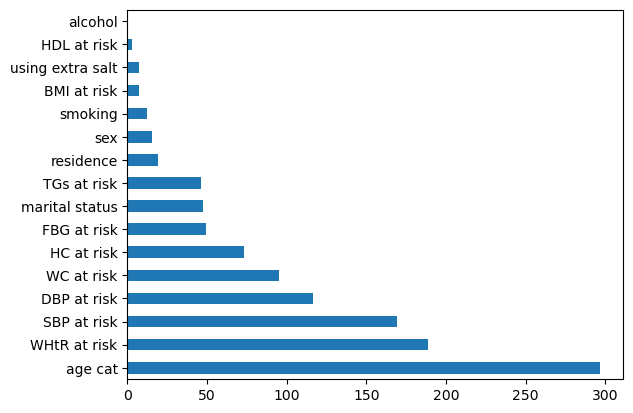

In [7]:
chi_values=pd.Series(chi_score[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot(kind='barh')
plt.show()

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)
y_pred=dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

0.750814332247557

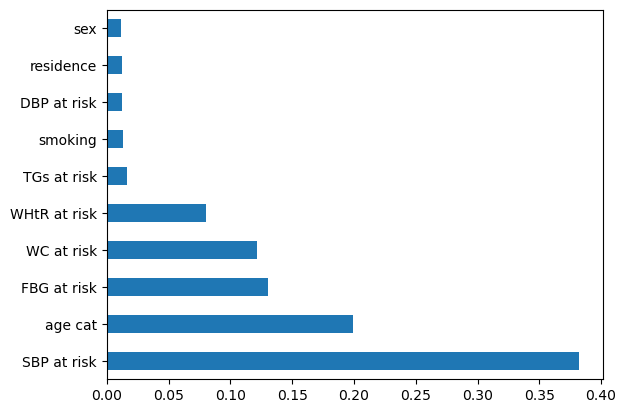

In [10]:
fi_dt=pd.Series(dt_clf.feature_importances_,index=X.columns)
fi_dt.nlargest(10).plot(kind='barh')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_to_test = {
    'n_estimators':[40,50,60],
    'max_depth':[6,7,8]
}

#here you can put any parameter you want at every run, like random_state or verbosity
rf_model = RandomForestClassifier(random_state=42)
#here you specify the CV parameters, number of folds, numberof cores to use...
grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='f1_macro', n_jobs=4)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 

#best_params is a dict you can pass directly to train a model with optimal settings 
best_model = RandomForestClassifier(**best_params)
best_model

RandomForestClassifier(max_depth=7, n_estimators=50)

In [17]:
rf_clf=ensemble.RandomForestClassifier(max_depth=7,n_estimators=50)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.7626221498371335

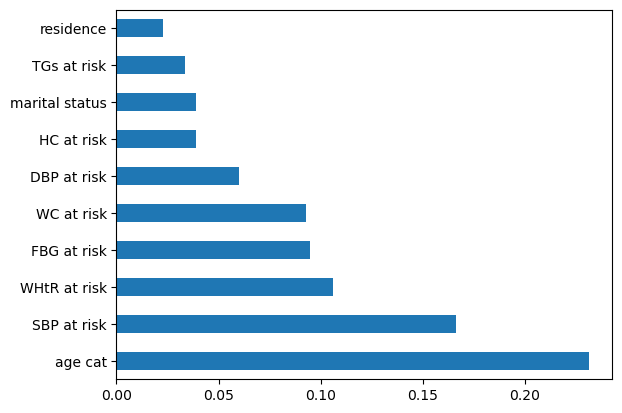

In [18]:
fi_rf=pd.Series(rf_clf.feature_importances_,index=X_train.columns)
fi_rf.nlargest(10).plot(kind='barh')
plt.show()

# Data Preprocessing

In [20]:
x=df.values
x=df.loc[ :,['age cat','SBP at risk','WHtR at risk','FBG at risk','WC at risk','DBP at risk','HC at risk','marital status','TGs at risk','residence']]
y=df.loc[ :,['having metabolic disease']]

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Decision Tree

In [22]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)
y_pred=dt_clf.predict(x_test)
dt_clf.score(x_test,y_test)

0.750814332247557

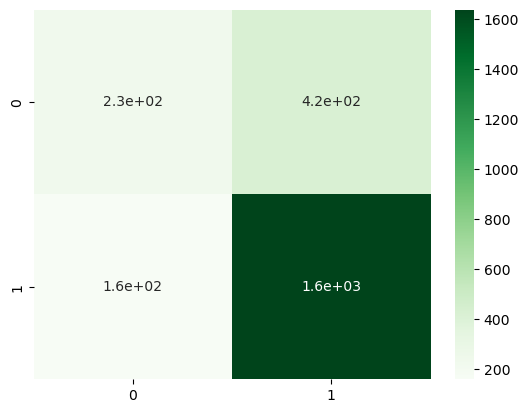

array([[ 234,  425],
       [ 160, 1637]], dtype=int64)

In [105]:
y_pred=dt_clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sb.heatmap(cm,cmap="Greens",annot=True)
plt.show()
cm

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_to_test = {
    'n_estimators':[40,50,60],
    'max_depth':[8,9,10]
}

#here you can put any parameter you want at every run, like random_state or verbosity
rf_model = RandomForestClassifier(random_state=42)
#here you specify the CV parameters, number of folds, numberof cores to use...
grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='f1_macro', n_jobs=4)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_ 

#best_params is a dict you can pass directly to train a model with optimal settings 
best_model = RandomForestClassifier(**best_params)
best_model

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=8, n_estimators=40)

In [25]:
rf_clf=ensemble.RandomForestClassifier(max_depth=8,n_estimators=40)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5472\1960138592.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train,y_train)


0.7520358306188925

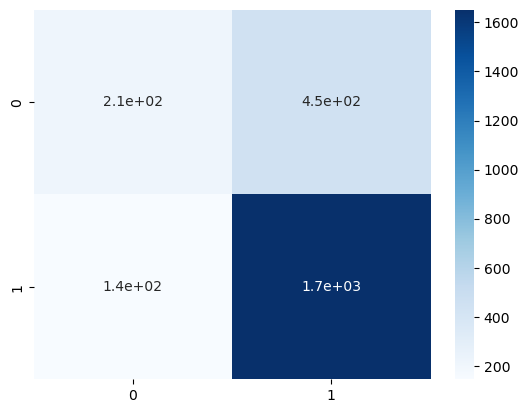

array([[ 210,  449],
       [ 145, 1652]], dtype=int64)

In [108]:
y_pred=rf_clf.predict(x_test)
cm1=confusion_matrix(y_test,y_pred)
sb.heatmap(cm1,cmap="Blues",annot=True)
plt.show()
cm1

# Support Vector Machine

In [109]:
svm_clf=SVC(probability=True,kernel='rbf',random_state=42)
svm_clf.fit(x_train,y_train)
svm_clf.score(x_test,y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7585504885993485

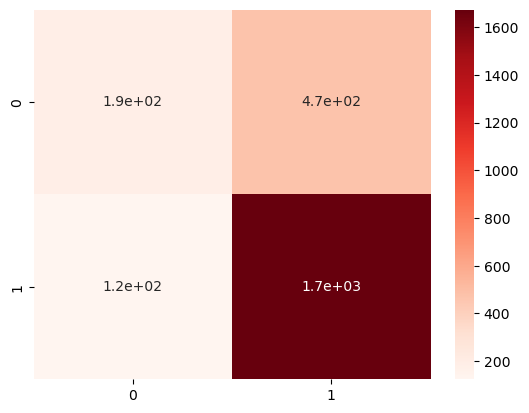

array([[ 190,  469],
       [ 124, 1673]], dtype=int64)

In [110]:
y_pred=svm_clf.predict(x_test)
cm2=confusion_matrix(y_test,y_pred)
sb.heatmap(cm2,cmap="Reds",annot=True)
plt.show()
cm2

# XGBoost

In [194]:
model_xgboost= xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=2,
                                      n_estimators=1000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)
eval_set = [(x_test, y_test)]

model_xgboost.fit(x_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.68760
[1]	validation_0-auc:0.69733
[2]	validation_0-auc:0.72581
[3]	validation_0-auc:0.72776
[4]	validation_0-auc:0.72118
[5]	validation_0-auc:0.72802
[6]	validation_0-auc:0.72595
[7]	validation_0-auc:0.73264
[8]	validation_0-auc:0.73322
[9]	validation_0-auc:0.73294
[10]	validation_0-auc:0.73671
[11]	validation_0-auc:0.73683
[12]	validation_0-auc:0.73700
[13]	validation_0-auc:0.73520
[14]	validation_0-auc:0.73574
[15]	validation_0-auc:0.73777
[16]	validation_0-auc:0.73759
[17]	validation_0-auc:0.73703
[18]	validation_0-auc:0.73761
[19]	validation_0-auc:0.73708
[20]	validation_0-auc:0.73712
[21]	validation_0-auc:0.73759
[22]	validation_0-auc:0.73922
[23]	validation_0-auc:0.73949
[24]	validation_0-auc:0.73989
[25]	validation_0-auc:0.73968
[26]	validation_0-auc:0.73963
[27]	validation_0-auc:0.73952
[28]	validation_0-auc:0.73851
[29]	validation_0-auc:0.73933
[30]	validation_0-auc:0.73954
[31]	validation_0-auc:0.73965
[32]	validation_0-auc:0.73976
[33]	validation_0-au

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [195]:
y_train_pred = model_xgboost.predict_proba(x_train)[:,1]
y_test_pred = model_xgboost.predict_proba(x_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.7405
AUC Valid: 0.7400


In [196]:
learning_rate_list = [0.1, 0.2, 0.3]
max_depth_list = [2, 3, 4]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.1, 0.2, 0.3],
 'max_depth': [2, 3, 4],
 'n_estimators': [1000, 2000, 3000]}

In [197]:
def my_roc_auc_score(model, x, y): return roc_auc_score(y, model.predict_proba(x)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.5,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(x, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.730, test=0.750) total time=   0.3s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=1000;, score=(train=0.756, test=0.724) total time=   0.2s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.730, test=0.748) total time=   0.8s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=2000;, score=(train=0.756, test=0.725) total time=   0.5s
[CV 1/2] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.730, test=0.748) total time=   0.7s
[CV 2/2] END learning_rate=0.1, max_depth=2, n_estimators=3000;, score=(train=0.756, test=0.724) total time=   0.8s
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.730, test=0.749) total time=   0.2s
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=1000;, score=(train=0.757, test=0.724) total time=   0.2s
[CV 1/2] EN

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x000002059A4E9C60>,
             verbose=4)

In [198]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
24,1,0.737267,0.743356,0.3,4,1000
17,2,0.737196,0.742848,0.2,4,3000
14,3,0.737191,0.743249,0.2,3,3000
21,4,0.737170,0.743347,0.3,3,1000
18,5,0.737160,0.743390,0.3,2,1000
15,6,0.737064,0.743495,0.2,4,1000
5,7,0.737033,0.743337,0.1,3,3000
26,8,0.736992,0.742336,0.3,4,3000
12,9,0.736963,0.743456,0.2,3,1000
0,10,0.736906,0.743261,0.1,2,1000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

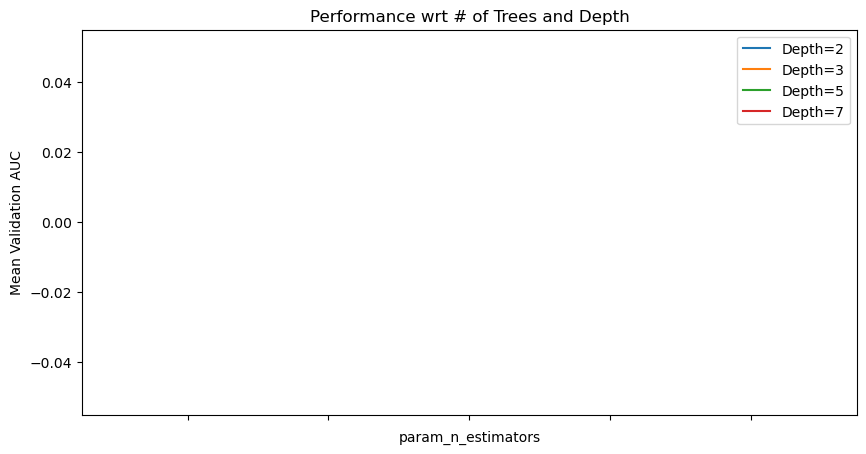

In [207]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)
# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]
# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

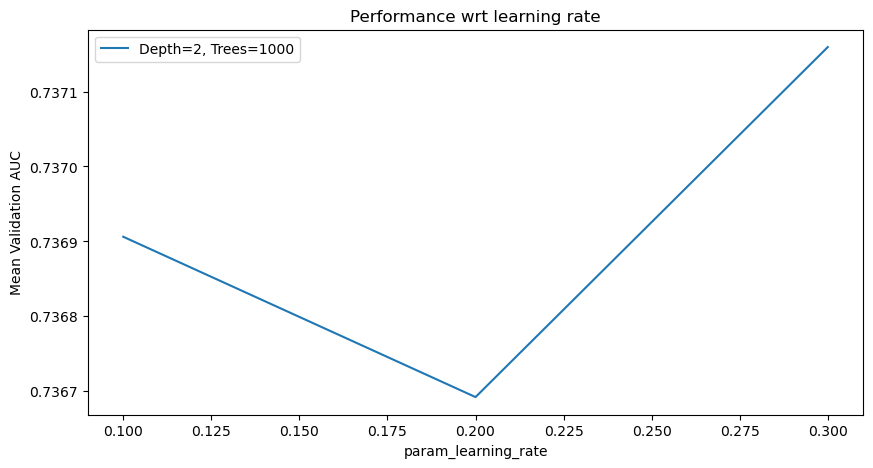

In [208]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)
# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==1000) & (df_cv_results['param_max_depth']==2),:]
# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=1000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [240]:
model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.5,
                                          max_depth=2,
                                          n_estimators=2000,
                                          subsample=0.25,
                                          colsample_bytree=0.5,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

eval_set = [(x_train, y_train),(x_test, y_test)]

model_xgboost_fin.fit(x_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.68988	validation_1-auc:0.68760
[1]	validation_0-auc:0.70240	validation_1-auc:0.69666
[2]	validation_0-auc:0.72539	validation_1-auc:0.72700
[3]	validation_0-auc:0.72679	validation_1-auc:0.72707
[4]	validation_0-auc:0.72337	validation_1-auc:0.72246
[5]	validation_0-auc:0.73195	validation_1-auc:0.73113
[6]	validation_0-auc:0.73440	validation_1-auc:0.73568
[7]	validation_0-auc:0.73732	validation_1-auc:0.73787
[8]	validation_0-auc:0.73756	validation_1-auc:0.73892
[9]	validation_0-auc:0.73724	validation_1-auc:0.74026
[10]	validation_0-auc:0.73951	validation_1-auc:0.73946
[11]	validation_0-auc:0.73959	validation_1-auc:0.74010
[12]	validation_0-auc:0.74034	validation_1-auc:0.74021
[13]	validation_0-auc:0.74075	validation_1-auc:0.73945
[14]	validation_0-auc:0.74040	validation_1-auc:0.73930
[15]	validation_0-auc:0.74022	validation_1-auc:0.74032
[16]	validation_0-auc:0.74029	validation_1-auc:0.73927
[17]	validation_0-auc:0.74033	validation_1-auc:0.74001
[18]	validation_0-au

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-auc:0.74058	validation_1-auc:0.73914
[45]	validation_0-auc:0.74065	validation_1-auc:0.73945
[46]	validation_0-auc:0.74083	validation_1-auc:0.73852
[47]	validation_0-auc:0.74061	validation_1-auc:0.73700
[48]	validation_0-auc:0.74074	validation_1-auc:0.73684
[49]	validation_0-auc:0.74135	validation_1-auc:0.73665
[50]	validation_0-auc:0.74198	validation_1-auc:0.73633
[51]	validation_0-auc:0.74210	validation_1-auc:0.73688
[52]	validation_0-auc:0.74207	validation_1-auc:0.73637
[53]	validation_0-auc:0.74202	validation_1-auc:0.73748
[54]	validation_0-auc:0.74211	validation_1-auc:0.73833
[55]	validation_0-auc:0.74227	validation_1-auc:0.73829


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [241]:
y_train_pred = model_xgboost_fin.predict_proba(x_train)[:,1]
y_test_pred = model_xgboost_fin.predict_proba(x_test)[:,1]

print("AUC Train: {:.2f}\nAUC Valid: {:.2f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.74
AUC Valid: 0.74


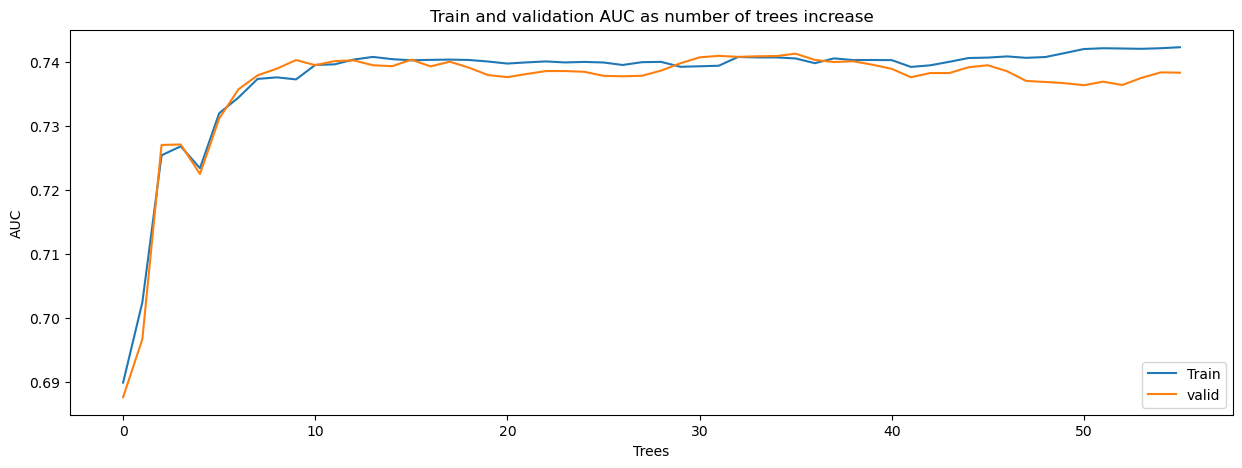

In [242]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [243]:
model_xgboost_fin.score(x_test,y_test)

0.7618078175895765

array([[ 236,  423],
       [ 162, 1635]], dtype=int64)

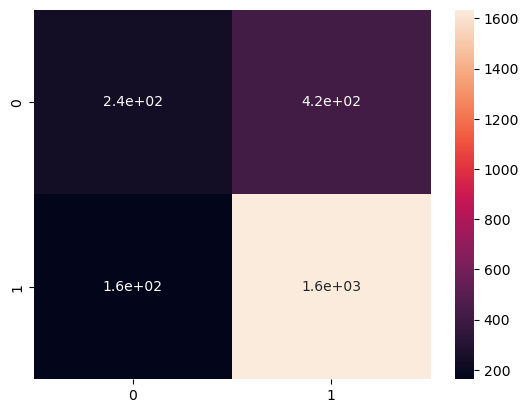

In [244]:
y_pred=model_xgboost_fin.predict(x_test)
cm3=confusion_matrix(y_test,y_pred)
sb.heatmap(cm3,annot=True)
cm3

# KNN

In [268]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7495928338762216

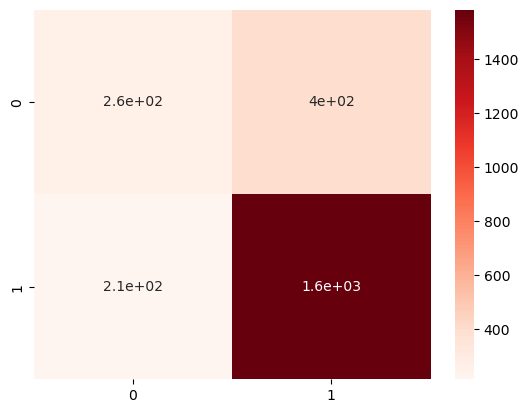

array([[ 258,  401],
       [ 214, 1583]], dtype=int64)

In [269]:
y_pred=knn.predict(x_test)
cm4=confusion_matrix(y_test,y_pred)
sb.heatmap(cm4,cmap="Reds",annot=True)
plt.show()
cm4

# Logistic Regression

In [270]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75814332247557

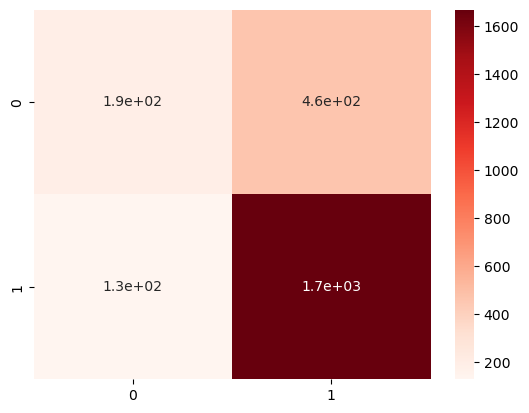

array([[ 194,  465],
       [ 129, 1668]], dtype=int64)

In [271]:
y_pred=lr.predict(x_test)
cm5=confusion_matrix(y_test,y_pred)
sb.heatmap(cm5,cmap="Reds",annot=True)
plt.show()
cm5

# Evaluation of Classifiers

In [272]:
names=['Decision Tree','Random Forest','Support Vector Machine','XGBoost','K-Nearest Neighbors','Logistic Regression']
classifiers=[dt_clf,rf_clf,svm_clf,model_xgboost,knn,lr]
scores=[]
for name, clf in zip(names,classifiers):
    clf.fit(x_train,y_train)
    score=clf.score(x_test,y_test)
    scores.append(score)
scores

C:\Users\Asus\AppData\Local\Temp\ipykernel_15940\2164395352.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[0.7618078175895765,
 0.75814332247557,
 0.7585504885993485,
 0.759771986970684,
 0.7495928338762216,
 0.75814332247557]

In [273]:
df_clf=pd.DataFrame()
df_clf['name']=names
df_clf['scores']=scores
df_clf

,name,scores
0,Decision Tree,0.761808
1,Random Forest,0.758143
2,Support Vector Machine,0.758550
3,XGBoost,0.759772
4,K-Nearest Neighbors,0.749593
5,Logistic Regression,0.758143


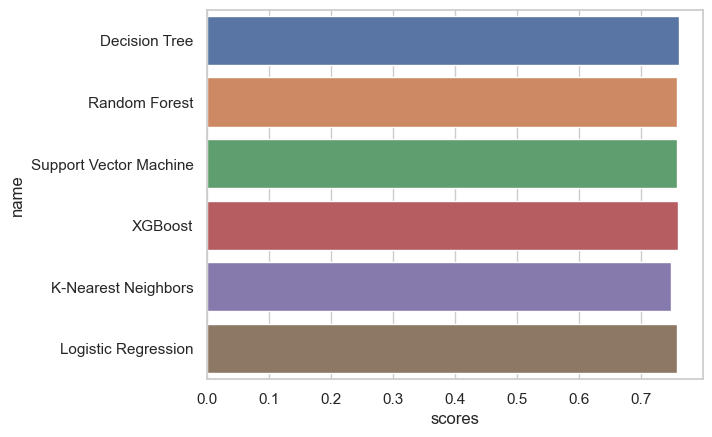

In [274]:
sb.set(style='whitegrid')
plot=sb.barplot(y='name',x='scores',data=df_clf)

# Prediction Probability of Classifiers

In [275]:
r_probs=[0 for _ in range(len(y_test))]
dt_probs=dt_clf.predict_proba(x_test)
rf_probs=rf_clf.predict_proba(x_test)
svm_probs=svm_clf.predict_proba(x_test)
xgb_probs=model_xgboost.predict_proba(x_test)
knn_probs=knn.predict_proba(x_test)
lr_probs=lr.predict_proba(x_test)

In [276]:
dt_probs=dt_probs[:, 1]
rf_probs=rf_probs[:, 1]
svm_probs=svm_probs[:, 1]
xgb_probs=xgb_probs[:, 1]
knn_probs=knn_probs[:, 1]
lr_probs=lr_probs[:, 1]

# Compute AUROC values

In [277]:
r_auc=roc_auc_score(y_test,r_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
rf_auc=roc_auc_score(y_test,rf_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
xgb_auc=roc_auc_score(y_test,xgb_probs)
knn_auc=roc_auc_score(y_test,knn_probs)
lr_auc=roc_auc_score(y_test,lr_probs)

In [278]:
print('Random prediction: AUROC= %.3f'%(r_auc))
print('Decision Tree: AUROC= %.3f'%(dt_auc))
print('Random Forest: AUROC= %.3f'%(rf_auc))
print('Support Vector Machine: AUROC= %.3f'%(svm_auc))
print('XGBoost: AUROC= %.3f'%(xgb_auc))
print('KNN: AUROC= %.3f'%(knn_auc))
print('Logistic Regression: AUROC= %.3f'%(lr_auc))

Random prediction: AUROC= 0.500
Decision Tree: AUROC= 0.729
Random Forest: AUROC= 0.735
Support Vector Machine: AUROC= 0.604
XGBoost: AUROC= 0.738
KNN: AUROC= 0.702
Logistic Regression: AUROC= 0.741


# Calculate ROC Curve

In [279]:
r_fpr,r_tpr,_= roc_curve(y_test,r_probs)
dt_fpr,dt_tpr,_= roc_curve(y_test,dt_probs)
rf_fpr,rf_tpr,_= roc_curve(y_test,rf_probs)
svm_fpr,svm_tpr,_= roc_curve(y_test,svm_probs)
xgb_fpr,xgb_tpr,_= roc_curve(y_test,xgb_probs)
knn_fpr,knn_tpr,_= roc_curve(y_test,knn_probs)
lr_fpr,lr_tpr,_= roc_curve(y_test,lr_probs)

# Plot the ROC Curve

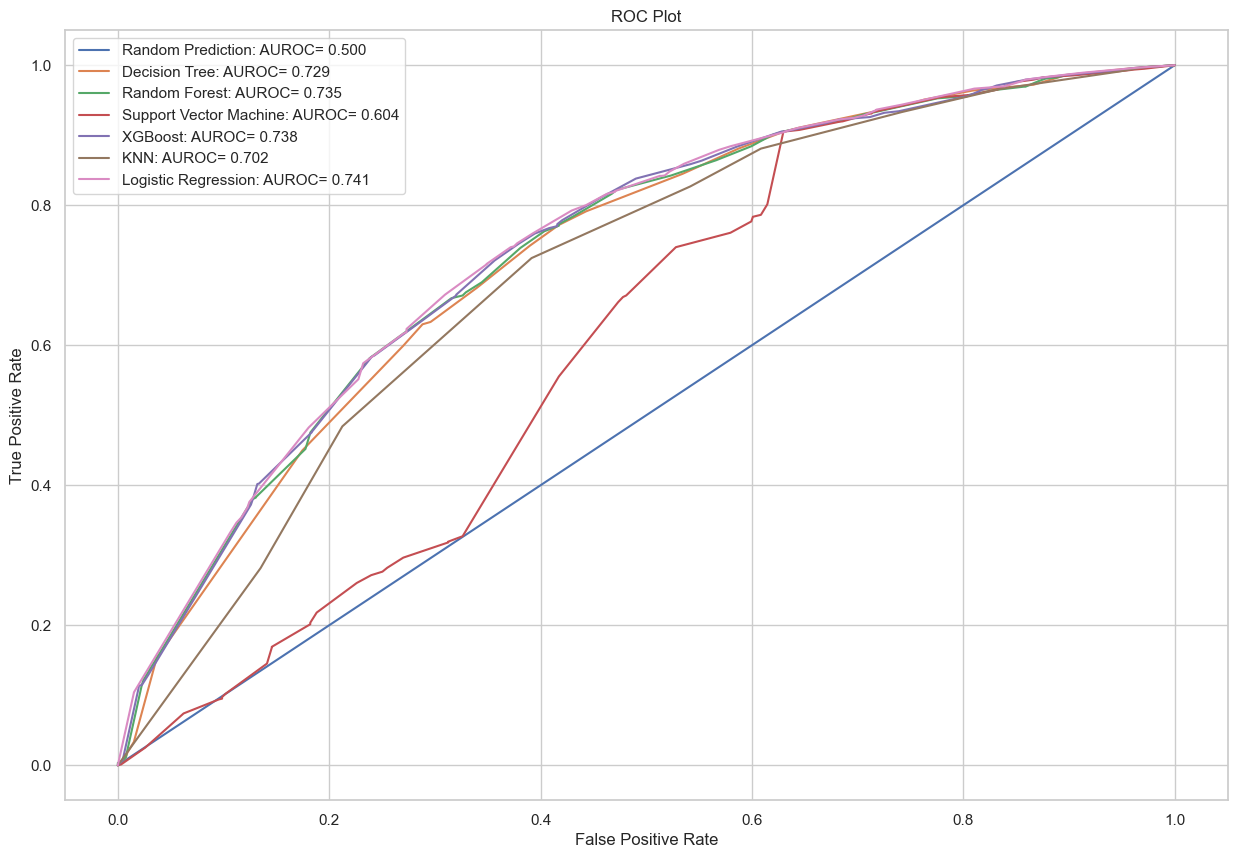

In [280]:
plt.figure(figsize=(15,10))

plt.plot(r_fpr,r_tpr,label='Random Prediction: AUROC= %.3f'% r_auc)
plt.plot(dt_fpr,dt_tpr,label='Decision Tree: AUROC= %.3f'% dt_auc)
plt.plot(rf_fpr,rf_tpr,label='Random Forest: AUROC= %.3f'% rf_auc)
plt.plot(svm_fpr,svm_tpr,label='Support Vector Machine: AUROC= %.3f'% svm_auc)
plt.plot(xgb_fpr,xgb_tpr,label='XGBoost: AUROC= %.3f'% xgb_auc)
plt.plot(knn_fpr,knn_tpr,label='KNN: AUROC= %.3f'% knn_auc)
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression: AUROC= %.3f'% lr_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [281]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.29      0.40       659
           1       0.78      0.93      0.85      1797

    accuracy                           0.76      2456
   macro avg       0.69      0.61      0.62      2456
weighted avg       0.73      0.76      0.73      2456

